In [1]:
from __future__ import print_function

import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from sklearn.metrics import precision_recall_curve, log_loss, recall_score, precision_score
from data import image_cols, image_rows, load_test_data
from train import smooth

Using TensorFlow backend.


In [44]:
def prep(img):
    img = img.astype('float32')
    img = (img > 0.5).astype(np.uint8)
    img = resize(img, (image_cols, image_rows), preserve_range=True)
    return img

def dice_coef(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

In [45]:
imgs_test, imgs_id_test = load_test_data()

In [82]:
imgs_test_pred = np.load('imgs_mask_test_final.npy')
imgs_test_gt = np.load('imgs_mask_test_gt.npy')

In [83]:
argsort = np.argsort(imgs_id_test)
imgs_id_test = imgs_id_test[argsort]
imgs_test = imgs_test[argsort]
imgs_test_pred = imgs_test_pred[argsort]
imgs_test_gt = imgs_test_gt[argsort]

In [84]:
total = imgs_test.shape[0]

In [85]:
gts = np.array([])
preds = np.array([])
dice_coefs = []
for i in range(total):
    img_pred = imgs_test_pred[i]
    img_pred = prep(img_pred).flatten()
    img_pred = (img_pred > 0.5).astype(np.uint8)
    
    img_gt = imgs_test_gt[i]
    img_gt = prep(img_gt).flatten()
    img_gt = (img_gt > 0.5).astype(np.uint8)
    
    gts = np.append(gts, img_gt)
    preds = np.append(preds, img_pred)
    
    dice_coefs.append(dice_coef(img_gt, img_pred))

    if i % 100 == 0:
        print('{}/{}'.format(i, total))

0/480
100/480
200/480
300/480
400/480


In [86]:
precision_score(gts, preds)

0.193573264781491

In [81]:
recall_score(gts, preds)

0.0422865252861475

In [91]:
d = np.array(dice_coefs)
d.mean()

0.5083452408226782

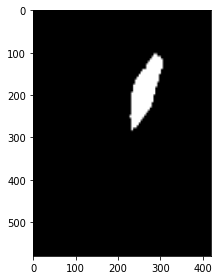

In [18]:
mask = imread('preds_500/205_pred.png')
imshow(prep(mask), cmap='gray')

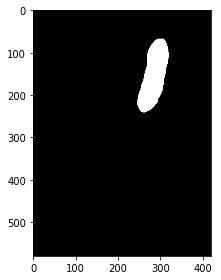

In [19]:
gt_mask = imread('raw/test/20_5_mask.tif')
imshow(prep(gt_mask), cmap='gray')